In [1]:
import geopandas as gpd
%matplotlib inline
guayalin = gpd.read_file('Shp/Guayaqui_Lineas.shp')

In [3]:
guayalin.columns

Index(['osm_id', 'name', 'highway', 'waterway', 'aerialway', 'barrier',
       'man_made', 'z_order', 'other_tags', 'SPEED2', 'geometry'],
      dtype='object')

In [11]:
guayalin.head()

,osm_id,name,highway,waterway,aerialway,barrier,man_made,z_order,other_tags,SPEED2,geometry
0,1,Francisco De Orellana,trunk,None,None,None,None,8,"""alt_name""=>""Eje"",""lanes""=>""3"",""maxspeed""=>""70...",60,"LINESTRING (-79.9048588 -2.1402705, -79.904698..."
1,1,Francisco De Orellana,trunk,None,None,None,None,28,"""alt_name""=>""Eje"",""bridge""=>""yes"",""lanes""=>""3""...",60,"LINESTRING (-79.90705610000001 -2.1371827, -79..."
2,0,Francisco De Orellana,trunk,None,None,None,None,8,"""alt_name""=>""Eje"",""lanes""=>""3"",""oneway""=>""yes""...",120,"LINESTRING (-79.906914 -2.1370944, -79.9072525..."
3,1,Francisco De Orellana,trunk,None,None,None,None,28,"""alt_name""=>""Eje"",""bridge""=>""yes"",""lanes""=>""3""...",60,"LINESTRING (-79.90470879999999 -2.1401821, -79..."
4,1,Rodolfo Baquerizo Nazur,primary,None,None,None,None,7,"""alt_name""=>""Calle 19 NE"",""lanes""=>""2"",""oneway...",60,"LINESTRING (-79.9076202 -2.1325849, -79.907537..."


In [13]:
guayalin.describe()

,z_order,SPEED2
count,2265.000000,2265.000000
mean,2.420751,62.251656
std,2.959982,11.405561
min,-20.000000,60.000000
25%,0.000000,60.000000
50%,3.000000,60.000000
75%,3.000000,60.000000
max,30.000000,120.000000


In [4]:
guayalin['highway'].value_counts()

residential       1163
footway            625
living_street       90
tertiary            88
secondary           84
primary             50
service             34
primary_link        23
trunk_link          23
trunk               19
secondary_link      17
steps                8
tertiary_link        4
cycleway             2
track                1
unclassified         1
Name: highway, dtype: int64

In [6]:
guayalin['waterway'].value_counts()

canal     6
river     1
stream    1
Name: waterway, dtype: int64

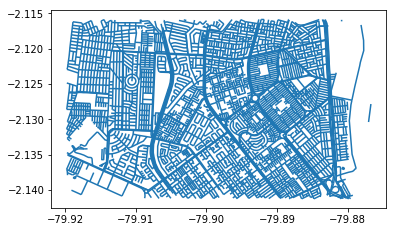

In [8]:
guayalin.plot();

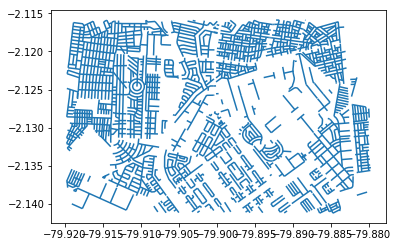

In [10]:
guayalin[guayalin['highway'] == 'residential'].plot();

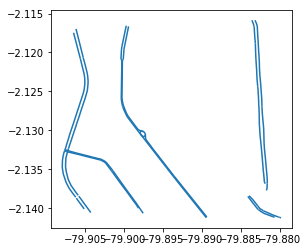

In [12]:
guayalin[guayalin['highway'] == 'primary'].plot();

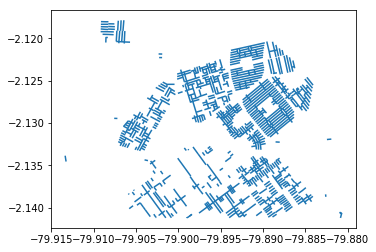

In [14]:
guayalin[guayalin['highway'] == 'footway'].plot();

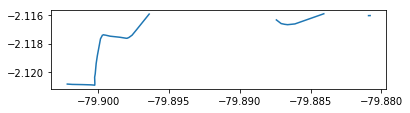

In [17]:
guayalin[guayalin['waterway'] == 'canal'].plot();

In [18]:
guayalin.crs

{'init': 'epsg:4326'}

In [20]:
guayalinutm = guayalin.to_crs(epsg = '32717')
guayalinutm['length'] = guayalinutm.length
guayalinutm.head()

,osm_id,name,highway,waterway,aerialway,barrier,man_made,z_order,other_tags,SPEED2,geometry,length
0,1,Francisco De Orellana,trunk,None,None,None,None,8,"""alt_name""=>""Eje"",""lanes""=>""3"",""maxspeed""=>""70...",60,LINESTRING (621784.7980486666 9763391.22772686...,30.090940
1,1,Francisco De Orellana,trunk,None,None,None,None,28,"""alt_name""=>""Eje"",""bridge""=>""yes"",""lanes""=>""3""...",60,LINESTRING (621540.6613140614 9763732.76381644...,419.820969
2,0,Francisco De Orellana,trunk,None,None,None,None,8,"""alt_name""=>""Eje"",""lanes""=>""3"",""oneway""=>""yes""...",120,LINESTRING (621556.4723937113 9763742.51429457...,498.183826
3,1,Francisco De Orellana,trunk,None,None,None,None,28,"""alt_name""=>""Eje"",""bridge""=>""yes"",""lanes""=>""3""...",60,LINESTRING (621801.4877645128 9763400.98860155...,420.324454
4,1,Rodolfo Baquerizo Nazur,primary,None,None,None,None,7,"""alt_name""=>""Calle 19 NE"",""lanes""=>""2"",""oneway...",60,LINESTRING (621478.2840785981 9764241.10331191...,31.682512


In [22]:
guayalinutm[guayalinutm['highway'] == 'primary']['length'].sum()

20633.072485968936